Carga de datos:

In [67]:
run Datos-1dia.ipynb

Vamos a ver gráficamente como se distribuyen los intervalos:

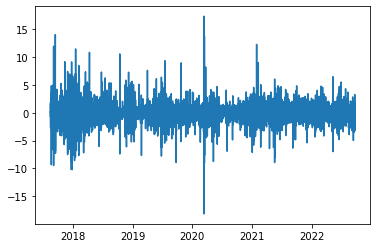

In [64]:
plt.plot((X_t1['Diferencia']*100)/X_t1['Anterior'])

Como hemos visto que los intervalos se mueven entre -20% y 20% (solo hay algunos valores que despuntan, vamos a clasificar en los siguientes conjuntos:

- Conjunto 1 - el porcentaje es mayor de 20%
- Conjunto 2 - el porcentaje esta entre el 10% y el 20%
- Conjunto 3 - el porcentaje esta entre el 5% y el 10%
- Conjunto 4 - el porcentaje esta entre el 0% y el 5%
- Conjunto 5 - el porcentaje esta entre el -5% y el 0%
- Conjunto 6 - el porcentaje esta entre el -10% y el -5%
- Conjunto 7 - el porcentaje esta entre el -20% y el -10%
- Conjunto 8 - el porcentaje es menor de -20%



In [68]:
def porintervalos (X):

    intervalos = (X['Diferencia']*100)/X['Anterior']
    for i in range(0,len(X)):
        int = intervalos[i]
        if (20 < int ):
            intervalos[i] = 1
            
        elif (20>int>10):
            intervalos[i]=2
  
        elif (10>int>5):
            intervalos[i]=3            
            
        elif (5>int>0):
            intervalos[i]=4            
            
        elif (0>int>-5):
            intervalos[i]=5
  
        elif (-5>int>-10):
            intervalos[i]=6            
            
        elif (-10>int>-20):
            intervalos[i]=7                                
            
        else:
            intervalos[i] = 8
    return intervalos

In [70]:
X_t1

,Open,High,Low,Close,Volume,Anterior,Diferencia,Anterior-1,Diferencia-1,Subida,Subida-1
datetime,,,,,,,,,,,
2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,4139.98,381.309763,4108.37,31.61,4285.08,-176.71,1,0
2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,4086.29,467.083022,4139.98,-53.69,4108.37,31.61,0,1
2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,4016.00,691.743060,4086.29,-70.29,4139.98,-53.69,0,0
2017-08-22 00:00:00+00:00,4016.00,4104.82,3400.00,4040.00,966.684858,4016.00,24.00,4086.29,-70.29,1,0
2017-08-23 00:00:00+00:00,4040.00,4265.80,4013.89,4114.01,1001.136565,4040.00,74.01,4016.00,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16 00:00:00+00:00,19701.88,19890.00,19320.01,19803.30,283791.070640,19701.88,101.42,20226.71,-524.83,1,0
2022-09-17 00:00:00+00:00,19803.30,20189.00,19748.08,20113.62,179350.243380,19803.30,310.32,19701.88,101.42,1,1
2022-09-18 00:00:00+00:00,20112.61,20117.26,19335.62,19416.18,254217.469040,20113.62,-697.44,19803.30,310.32,0,1


In [71]:
y_intervalos = porintervalos(X_t1)
y_intervalos

datetime
2017-08-19 00:00:00+00:00    4.0
2017-08-20 00:00:00+00:00    5.0
2017-08-21 00:00:00+00:00    5.0
2017-08-22 00:00:00+00:00    4.0
2017-08-23 00:00:00+00:00    4.0
                            ... 
2022-09-16 00:00:00+00:00    4.0
2022-09-17 00:00:00+00:00    4.0
2022-09-18 00:00:00+00:00    5.0
2022-09-19 00:00:00+00:00    4.0
2022-09-20 00:00:00+00:00    5.0
Length: 1859, dtype: float64

Veamos como se han distribuido los datos en los diferentes conjuntos:

In [74]:
y_intervalos.value_counts()

4.0    808
5.0    737
6.0    126
3.0    121
2.0     38
7.0     27
1.0      1
8.0      1
dtype: int64

Redefinimos las dimensiones de las variables para que cuadren:

In [81]:
y_t1 = y_intervalos.shift(-1).dropna()
X_t1 = X_t1[:-1]